# Pandas vs Pickle vs Parquet vs Feather

<pre>
데이터 분석을 하다보면 Pandas를 이용하여 파일을 저장하곤 한다.
대규모 데이터 세트로 작업할 때 데이터를 저장해야 할 때, 공유하기 쉽고 보편적인 이유로 CSV를 파일형식으로 선택한다.
CSV외에도 데이터를 저장하는 방식인 pickle, parquet, feather을 사용해보고 그 속도와 용량을 체크해본다.
</pre>

In [1]:
# !pip install pyarrow
# !pip install fastparquet

In [2]:
import numpy as np
import pandas as pd

In [3]:
def get_dataset(size):
    """Create Fake Dataset: Food, Color, Age, Date, Bool, Prob
    Args:
        size (int): Size of Fake Dataset

    Returns:
        df (pd.DataFrame): Fake Dataset
    """
    df = pd.DataFrame()
    df['Food'] = np.random.choice(['Chicken','Pizza','Bread', 'Cheese', 'Meat'], size)
    df['Color'] = np.random.choice(['Red','Blue','Yellow','Green', 'Black'], size)
    df['Age'] = np.random.randint(1, 99, size)
    dates = pd.date_range('2022-01-01', '2099-12-31')
    df['date'] = np.random.choice(dates, size)
    df['Bool'] = np.random.choice(['yes','no'], size)
    df['Prob'] = np.random.uniform(0, 1, size)
    return df

### Reading and writing CSV

In [4]:
df = get_dataset(5_000_000)
%time df.to_csv('test.csv')
%time df_csv = pd.read_csv('test.csv')

Wall time: 45.9 s
Wall time: 2.68 s


In [5]:
# 파일 용량 체크
!dir /a test.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:21       287,281,863 test.csv
               1개 파일         287,281,863 바이트
               0개 디렉터리  123,222,245,376 바이트 남음


In [6]:
# 데이터 타입 및 메모리 사용량 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    object        
 1   Color   object        
 2   Age     int32         
 3   date    datetime64[ns]
 4   Bool    object        
 5   Prob    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 209.8+ MB


### Reading and writing Pickle

In [7]:
df = get_dataset(5_000_000)
%time df.to_pickle('test.pickle')
%time df_pickle = pd.read_pickle('test.pickle')

Wall time: 4.71 s
Wall time: 1.34 s


In [8]:
# 파일 용량 체크
!dir /a test.pickle

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:21       207,549,317 test.pickle
               1개 파일         207,549,317 바이트
               0개 디렉터리  123,008,770,048 바이트 남음


In [9]:
# 데이터 타입 및 메모리 사용량 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    object        
 1   Color   object        
 2   Age     int32         
 3   date    datetime64[ns]
 4   Bool    object        
 5   Prob    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 209.8+ MB


### Reading and writing Parquet

In [10]:
df = get_dataset(5_000_000)
%time df.to_parquet('test.parquet')
%time df_parquet = pd.read_parquet('test.parquet')

Wall time: 2.1 s
Wall time: 798 ms


In [11]:
# 파일 용량 체크
!dir /a test.parquet

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:21        58,684,566 test.parquet
               1개 파일          58,684,566 바이트
               0개 디렉터리  122,944,217,088 바이트 남음


In [12]:
# 데이터 타입 및 메모리 사용량 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    object        
 1   Color   object        
 2   Age     int32         
 3   date    datetime64[ns]
 4   Bool    object        
 5   Prob    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 209.8+ MB


### Reading and writing Feather

In [13]:
df = get_dataset(5_000_000)
%time df.to_feather('test.feather')
%time df_feather = pd.read_feather('test.feather')

Wall time: 917 ms
Wall time: 588 ms


In [14]:
# 파일 용량 체크
!dir /a test.feather

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:22       172,237,818 test.feather
               1개 파일         172,237,818 바이트
               0개 디렉터리  122,766,139,392 바이트 남음


In [15]:
# 데이터 타입 및 메모리 사용량 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    object        
 1   Color   object        
 2   Age     int32         
 3   date    datetime64[ns]
 4   Bool    object        
 5   Prob    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 209.8+ MB


### 비교해보자

In [16]:
!dir /a

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:22    <DIR>          .
2023-01-19  오후 09:21    <DIR>          ..
2023-01-19  오후 09:22    <DIR>          .ipynb_checkpoints
2023-01-19  오후 10:20           172,461 Pandas vs Pickle vs Parquet vs Feather.ipynb
2023-01-19  오후 10:21       287,281,863 test.csv
2023-01-19  오후 10:22       172,237,818 test.feather
2023-01-19  오후 10:21        58,684,566 test.parquet
2023-01-19  오후 10:21       207,549,317 test.pickle
               5개 파일         725,926,025 바이트
               3개 디렉터리  122,766,139,392 바이트 남음


<pre>
메모리 사용량은 모두 똑같고 파일 용량은 parquet로 저장한 파일의 용량이 가장 적다.
</pre>

In [32]:
# bytes --> mb
file_sizes = [287_284_601/1024/1024,
              207_547_071/1024/1024,
              58_684_425/1024/1024,
              172_236_130/1024/1024]
#
csv = [45.9, 2.68, file_sizes[0]]
pickle = [4.71, 1.34, file_sizes[1]]
parquet = [2.1, 0.798, file_sizes[2]]
feather = [0.917, 0.588, file_sizes[3]]
columns = ["Write Time", "Read Time", "File Size"]

df_compare = pd.DataFrame({'csv' : csv, 
                   'picke' : pickle, 
                   'parquet' : parquet,
                   'feather': feather},
                  index = columns).T
df_compare

,Write Time,Read Time,File Size
csv,45.900,2.680,273.975945
picke,4.710,1.340,197.932311
parquet,2.100,0.798,55.965829
feather,0.917,0.588,164.257174


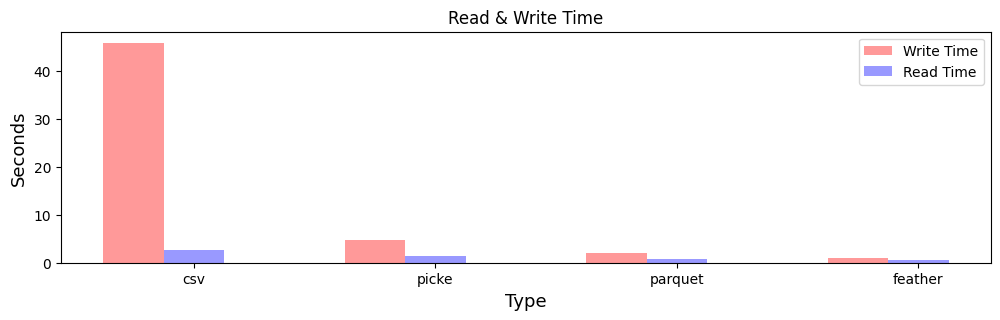

In [33]:
import matplotlib.pyplot as plt

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,3))
bar_width = 0.25

# 항목이 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 항목별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
plt.bar(index, df_compare['Write Time'], bar_width, alpha=0.4, color='red', label='Write Time')
plt.bar(index + bar_width, df_compare['Read Time'], bar_width, alpha=0.4, color='blue', label='Read Time')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_compare.index.to_list())

# x축, y축 이름 및 범례 설정
plt.xlabel('Type', size = 13)
plt.ylabel('Seconds', size = 13)
plt.legend()
plt.title("Read & Write Time")
plt.show()

<pre>
네 가지 파일 타입 중 읽고 쓰는 시간이 가장 빨랐던 타입은 feather이며 parquet, pickle, csv 순서로 나타났다.
CSV의 경우 읽는 시간은 다른 파일 타입의 읽는 시간보다 최대 2,1 초 정도 밖에 차이가 나지 않았으나,
파일을 기록/저장하는 시간의 경우 다른 타입 대비 40초 정도 차이가 났다.
</pre>

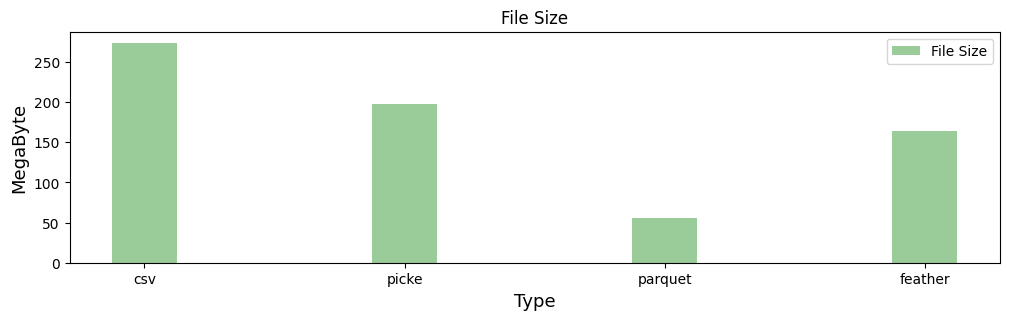

In [34]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,3))
bar_width = 0.25

# 항목이 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 항목별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
plt.bar(index, df_compare['File Size'], bar_width, alpha=0.4, color='Green', label='File Size')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(index, df_compare.index.to_list())

# x축, y축 이름 및 범례 설정
plt.xlabel('Type', size = 13)
plt.ylabel('MegaByte', size = 13)
plt.legend()
plt.title("File Size")
plt.show()

<pre>
네 가지 파일 타입 중 저장 용량이 가장 작았던 타입은 parquet이며 feather, pickle, csv 순서로 나타났다.
CSV의 경우 parquet 대비 약 5배가 넘는 용량을 보였으며 나머지 두 타입의 경우 3배 정도 차이가 났으며 서로 비슷한 수치를 보였다.
</pre>

메모리 사용량은 209mb 정도로 동일했는데, 이를 줄여서 한번 더 비교해보자.

In [20]:
def set_dtypes(df):
    """Set Data Types
    Args:
        df (pd.DataFrame): Fake Dataset

    Returns:
        df (pd.DataFrame): Fake Dataset
    """
    df['Food'] = df['Food'].astype('category')
    df['Color'] = df['Color'].astype('category')
    df['Age'] = df['Age'].astype('int16')
    df['Bool'] = df['Bool'].map({'yes':True, 'no': False})
    df['Prob'] = df['Prob'].astype('float32')
    return df

In [42]:
print('Reading and writing CSV')
df = get_dataset(5_000_000)
df = set_dtypes(df)

print(df.info())
%time df.to_csv('test.csv')
%time df_csv = pd.read_csv('test.csv')
print(df_csv.info())

Reading and writing CSV
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None
Wall time: 31.3 s
Wall time: 2.57 s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Food        object 
 2   Color       object 
 3   Age         int64  
 4   date        object 
 5   Bool        bool   
 6   Prob        float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 233.7+ MB
None


Unnamed: 0  int64 칼럼이 추가되었으며 데이터 타입을 인지하지 못했으며  233.7+ MB의 메모리를 사용하였다.

In [43]:
print('Reading and writing Pickle')
df = get_dataset(5_000_000)
df = set_dtypes(df)

print(df.info())
%time df.to_pickle('test.pickle')
%time df_pickle = pd.read_pickle('test.pickle')
print(df_pickle.info())

Reading and writing Pickle
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None
Wall time: 207 ms
Wall time: 47.1 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None


추가되는 칼럼이 없었으며 데이터 타입을 인지하였다.

In [44]:
print('Reading and writing Parquet')
df = get_dataset(5_000_000)
df = set_dtypes(df)

print(df.info())
%time df.to_parquet('test.parquet')
%time df_parquet = pd.read_parquet('test.parquet')
print(df_parquet.info())

Reading and writing Parquet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None
Wall time: 418 ms
Wall time: 146 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None


추가되는 칼럼이 없었으며 데이터 타입을 인지하였다.

In [45]:
print('Reading and writing Feather')
df = get_dataset(5_000_000)
df = set_dtypes(df)

print(df.info())
%time df.to_feather('test.feather')
%time df_feather = pd.read_feather('test.feather')
print(df_feather.info())

Reading and writing Feather
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None
Wall time: 126 ms
Wall time: 109 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Food    category      
 1   Color   category      
 2   Age     int16         
 3   date    datetime64[ns]
 4   Bool    bool          
 5   Prob    float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 81.1 MB
None


추가되는 칼럼이 없었으며 데이터 타입을 인지하였다.

In [25]:
!dir /a

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6641-4ECE

 C:\Users\asdm1\OneDrive\바탕 화면\KyuHanSeok\공부\머신러닝\Pandas 디렉터리

2023-01-19  오후 10:22    <DIR>          .
2023-01-19  오후 09:21    <DIR>          ..
2023-01-19  오후 09:22    <DIR>          .ipynb_checkpoints
2023-01-19  오후 10:22            72,214 Pandas vs Pickle vs Parquet vs Feather.ipynb
2023-01-19  오후 10:22       254,073,113 test.csv
2023-01-19  오후 10:22        75,588,306 test.feather
2023-01-19  오후 10:22        39,008,977 test.parquet
2023-01-19  오후 10:22        85,001,843 test.pickle
               5개 파일         453,744,453 바이트
               3개 디렉터리  123,010,211,840 바이트 남음


<pre>
사용 메모리가 209MB에서 81.1 MB로 대폭 줄었으며
읽고 쓰는 속도와 파일 용량이 훨씬 더 줄었다.
데이터 타입 변경 후와 비교하여 나타내보자.
<pre>

In [46]:
# 기존 파일
# bytes --> mb
file_sizes = [287_284_601/1024/1024,
              207_547_071/1024/1024,
              58_684_425/1024/1024,
              172_236_130/1024/1024]
#
csv = [45.9, 2.68, file_sizes[0]]
pickle = [4.71, 1.34, file_sizes[1]]
parquet = [2.1, 0.798, file_sizes[2]]
feather = [0.917, 0.588, file_sizes[3]]
columns = ["Write Time", "Read Time", "File Size"]

df_compare = pd.DataFrame({'csv' : csv, 
                   'picke' : pickle, 
                   'parquet' : parquet,
                   'feather': feather},
                  index = columns).T
df_compare

,Write Time,Read Time,File Size
csv,45.900,2.680,273.975945
picke,4.710,1.340,197.932311
parquet,2.100,0.798,55.965829
feather,0.917,0.588,164.257174


In [47]:
# 축약된 파일
# bytes --> mb
file_sizes2 = [254_072_405/1024/1024,
              85_001_843/1024/1024,
              39_008_921/1024/1024,
              75_581_514/1024/1024]
#
csv = [31.3, 2.57, file_sizes2[0]]
pickle = [0.207, 0.041, file_sizes2[1]]
parquet = [0.418, 0.146, file_sizes2[2]]
feather = [0.126, 0.109, file_sizes2[3]]
columns = ["Write Time: Converted", "Read Time: Converted", "File Size: Converted"]


df_abbr = pd.DataFrame({'csv' : csv, 
                   'picke' : pickle, 
                   'parquet' : parquet,
                   'feather': feather},
                  index = columns).T
df_abbr

,Write Time: Converted,Read Time: Converted,File Size: Converted
csv,31.300,2.570,242.302327
picke,0.207,0.041,81.064075
parquet,0.418,0.146,37.201806
feather,0.126,0.109,72.080149


In [48]:
df_compare = pd.concat([df_compare, df_abbr], axis=1)
df_compare

,Write Time,Read Time,File Size,Write Time: Converted,Read Time: Converted,File Size: Converted
csv,45.900,2.680,273.975945,31.300,2.570,242.302327
picke,4.710,1.340,197.932311,0.207,0.041,81.064075
parquet,2.100,0.798,55.965829,0.418,0.146,37.201806
feather,0.917,0.588,164.257174,0.126,0.109,72.080149


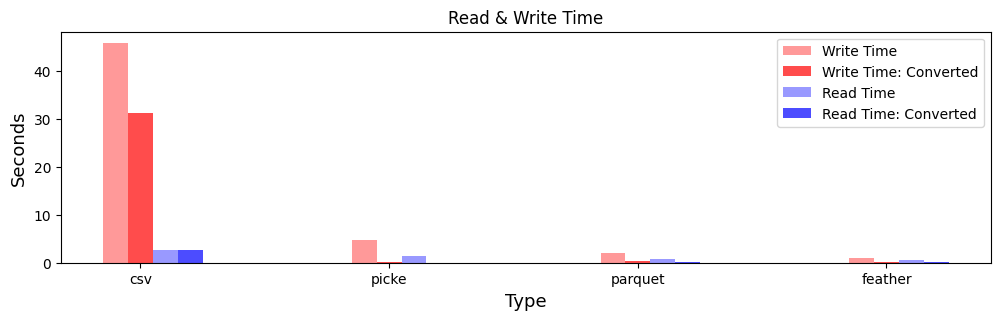

In [49]:
import matplotlib.pyplot as plt

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,3))
bar_width = 0.1

# 항목이 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 항목별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
plt.bar(index, df_compare['Write Time'], bar_width, 
        alpha=0.4, color='red', label='Write Time')
plt.bar(index + bar_width, df_compare['Write Time: Converted'], bar_width, 
        alpha=0.7, color='red', label='Write Time: Converted')
plt.bar(index + 2 * bar_width, df_compare['Read Time'], bar_width, 
        alpha=0.4, color='blue', label='Read Time')
plt.bar(index + 3 * bar_width, df_compare['Read Time: Converted'], bar_width, 
        alpha=0.7, color='blue', label='Read Time: Converted')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_compare.index.to_list())

# x축, y축 이름 및 범례 설정
plt.xlabel('Type', size = 13)
plt.ylabel('Seconds', size = 13)
plt.legend()
plt.title("Read & Write Time")
plt.show()

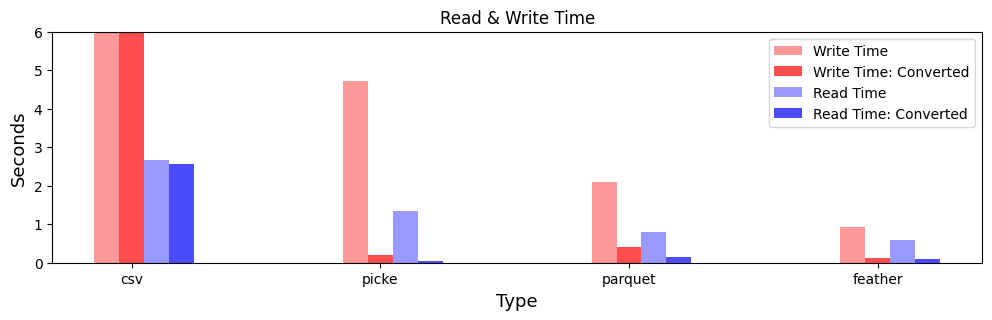

In [50]:
ax.set_ylim(0, 6)
fig

<pre>
데이터 타입을 변경한 후,
네 가지 파일 타입 중 읽고 쓰는 시간이 가장 빨랐던 타입은 feather이며 pickle, parquet, csv 순서로 나타났다.
파일을 저장하는 시간에서 가장 많은 비율 차이를 보인 것은 pickle 이었다.
</pre>

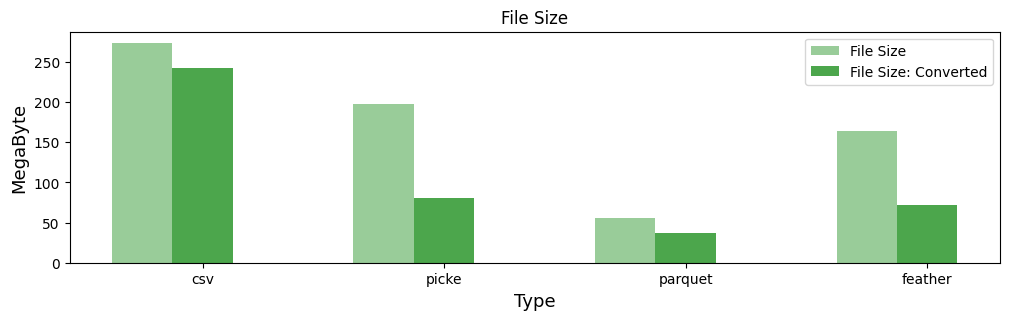

In [51]:
import matplotlib.pyplot as plt

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,3))
bar_width = 0.25

# 항목이 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 항목별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
plt.bar(index, df_compare['File Size'], bar_width, alpha=0.4, color='Green', label='File Size')
plt.bar(index + bar_width, df_compare['File Size: Converted'], bar_width, alpha=0.7, color='Green', label='File Size: Converted')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_compare.index.to_list())

# x축, y축 이름 및 범례 설정
plt.xlabel('Type', size = 13)
plt.ylabel('MegaByte', size = 13)
plt.legend()
plt.title("File Size")
plt.show()

<pre>
데이터 타입을 변경한 후,
네 가지 파일 타입 중 저장 용량이 가장 적었던 타입은 parquet이며 feather, pickle, csv 순서로 나타났다.
파일을 저장하는 용량 차이가 가장 컸던 타입은 pickle 이었다.


</pre>
<pre>
이제까지는 CSV만을 이용하여 데이터 분석을 하곤 했었는데, 다양한 종류의 데이터 형식을 접할 수 있었다.
CSV는 위의 결과에서도 알 수 있듯이 
많은 저장공간을 차지하여 비효율적일 수 있고 메타 데이터를 저장하지 못했으며 많은 메모리를 사용하였다.

따라서 상황에 따라 알맞은 파일 형식을 취할 줄 알아야 한다.

위 비교 결과는 컴퓨터 사양과 데이터 유형이 다양한 데이터 세트마다 조금씩 다를 수 있으며 
접하는 데이터 세트마다 가장 적합한 것이 무엇인지 확인하는 것이 가장 좋겠다.

오늘 처음 접하는 parquet의 장단점을 아래에 간단히 기술하였다.
[parquet]
- 장점: 파입 압축과 쓰기, 읽기에 탁월하다.
        분산처리에 적합하다
- 단점: 데이터에 2차원 배열을 쓸 수 없다. (리스트만 가능)
</pre>